## Loading Libraries:-

In [110]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")

## Loading Data:-

In [48]:
train_data = pd.read_excel("Train.xlsx")
test_data = pd.read_excel("Test.xlsx")

In [49]:
print("Samples of Train Data:-")
train_data.head(5)

Samples of Train Data:-


,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [50]:
print("Samples of Test Data:-")
test_data.head(5)

Samples of Test Data:-


,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep70101,C21844,PR6483,102,1115
1,Rep70102,C21844,PR6251,102,1050
2,Rep70103,C21844,PR6253,344,3490
3,Rep70104,C21844,PR6378,108,1095
4,Rep70105,C21844,PR6463,146,1055


### Function for counting rows ang columns:-

In [51]:
def count_rows_And_columns(df,name):
    print("Number of rows in",name,"are :",df.shape[0])
    print("Number of columns in",name,"are :",df.shape[1])

In [52]:
count_rows_And_columns(train_data,"Train Data")

Number of rows in Train Data are : 42582
Number of columns in Train Data are : 6


In [53]:
count_rows_And_columns(test_data,"Test Data")

Number of rows in Test Data are : 9135
Number of columns in Test Data are : 5


### Function for getting Column Names:-

In [54]:
def col_names(df,name):
    print("Columns in ",name," are: ",list(df.columns))

In [55]:
col_names(train_data,"Train Data")
col_names(test_data,"Test Data")

Columns in  Train Data  are:  ['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue', 'Suspicious']
Columns in  Test Data  are:  ['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue']


### Function for dropping Columns:-

In [56]:
def drop_fun(df,cols):
    for i in cols:
        df=df.drop(i,axis=1)
        
    return df    

In [57]:
train_data=drop_fun(train_data,["ReportID"])
test_data=drop_fun(test_data,["ReportID"])

In [58]:
col_names(train_data,"Train Data")
col_names(test_data,"Test Data")

Columns in  Train Data  are:  ['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue', 'Suspicious']
Columns in  Test Data  are:  ['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue']


### data Description:-

In [59]:
print("Train Data:-")
train_data.describe(include='all').transpose()

Train Data:-


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SalesPersonID,42582,992,C21976,1359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductID,42582,593,PR6253,2590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,42582,NaN,NaN,NaN,4910.05,98336.2,33,111,206,1136,1.97081e+07
TotalSalesValue,42582,NaN,NaN,NaN,16209.2,59972,598,1345,2980,10765,3.95398e+06
Suspicious,42582,3,indeterminate,39846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
print("Test Data:-")
test_data.describe(include='all').transpose()

Test Data:-


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SalesPersonID,9135,241,C21972,875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductID,9135,412,PR6253,604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,9135,NaN,NaN,NaN,3096.87,22304.4,35,107,161,680,1.21552e+06
TotalSalesValue,9135,NaN,NaN,NaN,11542.1,36712.9,935,1205,2235,7817.5,1.29869e+06


### Column types and conversion:-

In [61]:
print("Train Data:-")
train_data.dtypes

Train Data:-


SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [62]:
print("Test Data:-")
test_data.dtypes

Test Data:-


SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
dtype: object

### Checking NA values:-

In [63]:
print("Train Data:-")
print(train_data.isnull().sum())
print("Test Data:-")
print(test_data.isnull().sum())

Train Data:-
SalesPersonID      0
ProductID          0
Quantity           0
TotalSalesValue    0
Suspicious         0
dtype: int64
Test Data:-
SalesPersonID      0
ProductID          0
Quantity           0
TotalSalesValue    0
dtype: int64


In [64]:
train_data_1 = train_data
test_data_1 = test_data

### Target attribute (Suspicious) from strings to numbers :-

In [65]:
train_data_1.loc[train_data_1.Suspicious == "Yes", 'Suspicious'] = 1
train_data_1.loc[train_data_1.Suspicious == "No", 'Suspicious'] = 2
train_data_1.loc[train_data_1.Suspicious == "indeterminate", 'Suspicious'] = 3

In [66]:
train_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,C21116,PR6112,182,1665,3
1,C21116,PR6112,182,1740,3
2,C21116,PR6253,101,1040,3
3,C21116,PR6253,283,4495,2
4,C21116,PR6294,108,1465,3
5,C21116,PR6253,421,6655,3
6,C21116,PR6294,117,1860,3
7,C21116,PR6253,103,1120,3
8,C21116,PR6112,182,1740,3
9,C21116,PR6297,150,2300,3


In [67]:
co= train_data_1['Suspicious'].value_counts()
percentage=co/(train_data_1.shape[0])*100
percentage

3    93.574750
2     6.000188
1     0.425062
Name: Suspicious, dtype: float64

### Generating new Features:-

##### Creating new feature product_price which  is the ratioo of TotalSalesValue and Quantity.

In [68]:
train_data_1["Product_Price"] = train_data_1["TotalSalesValue"]/train_data_1["Quantity"]
train_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price
0,C21116,PR6112,182,1665,3,9.148352
1,C21116,PR6112,182,1740,3,9.560440
2,C21116,PR6253,101,1040,3,10.297030
3,C21116,PR6253,283,4495,2,15.883392
4,C21116,PR6294,108,1465,3,13.564815
5,C21116,PR6253,421,6655,3,15.807601
6,C21116,PR6294,117,1860,3,15.897436
7,C21116,PR6253,103,1120,3,10.873786
8,C21116,PR6112,182,1740,3,9.560440
9,C21116,PR6297,150,2300,3,15.333333


In [69]:
test_data_1["Product_Price"] = test_data_1["TotalSalesValue"]/test_data_1["Quantity"]
test_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price
0,C21844,PR6483,102,1115,10.931373
1,C21844,PR6251,102,1050,10.294118
2,C21844,PR6253,344,3490,10.145349
3,C21844,PR6378,108,1095,10.138889
4,C21844,PR6463,146,1055,7.226027
5,C21844,PR6112,238,1495,6.281513
6,C21844,PR6463,177,1090,6.158192
7,C21844,PR6378,108,1095,10.138889
8,C21844,PR6253,107,1015,9.485981
9,C21844,PR6458,100,1040,10.400000


##### Creating new feature Mean_Product_Price which  shows the mean price of each product.

In [70]:
d1 = train_data_1.groupby(['ProductID'])[['Product_Price']].mean()
d1=d1.rename(index=str, columns={"Product_Price" : "Mean_Product_Price"})
train_data_1 = train_data_1.join(d1,on= 'ProductID')
train_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price
0,C21116,PR6112,182,1665,3,9.148352,14.164825
1,C21116,PR6112,182,1740,3,9.560440,14.164825
2,C21116,PR6253,101,1040,3,10.297030,16.161482
3,C21116,PR6253,283,4495,2,15.883392,16.161482
4,C21116,PR6294,108,1465,3,13.564815,20.898267
5,C21116,PR6253,421,6655,3,15.807601,16.161482
6,C21116,PR6294,117,1860,3,15.897436,20.898267
7,C21116,PR6253,103,1120,3,10.873786,16.161482
8,C21116,PR6112,182,1740,3,9.560440,14.164825
9,C21116,PR6297,150,2300,3,15.333333,22.149449


In [71]:
d1 = test_data_1.groupby(['ProductID'])[['Product_Price']].mean()
d1=d1.rename(index=str, columns={"Product_Price" : "Mean_Product_Price"})
test_data_1 = test_data_1.join(d1,on= 'ProductID')
test_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price
0,C21844,PR6483,102,1115,10.931373,9.589537
1,C21844,PR6251,102,1050,10.294118,10.807918
2,C21844,PR6253,344,3490,10.145349,12.240047
3,C21844,PR6378,108,1095,10.138889,20.299865
4,C21844,PR6463,146,1055,7.226027,8.386834
5,C21844,PR6112,238,1495,6.281513,8.099289
6,C21844,PR6463,177,1090,6.158192,8.386834
7,C21844,PR6378,108,1095,10.138889,20.299865
8,C21844,PR6253,107,1015,9.485981,12.240047
9,C21844,PR6458,100,1040,10.400000,11.289418


##### Creating new feature Mean_TotalSalesValue_ByPerson which shows average TotalSalesValue foe each salesperson.

In [72]:
d1 = train_data_1.groupby(['SalesPersonID'])[['TotalSalesValue']].mean()
d1 = d1.rename(index=str, columns={"TotalSalesValue": "Mean_TotalSalesValue_ByPerson"})
train_data_1 = train_data_1.join(d1,on= 'SalesPersonID')
train_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0


In [73]:
d1 = test_data_1.groupby(['SalesPersonID'])[['TotalSalesValue']].mean()
d1 = d1.rename(index=str, columns={"TotalSalesValue": "Mean_TotalSalesValue_ByPerson"})
test_data_1 = test_data_1.join(d1,on= 'SalesPersonID')
test_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0


#### Creating new feature Avg_SellingQty which  shows the mean selling quantity of each product.

#### Creating new feature Ratio_saleQty_to_AvgSellingQty which  shows the ratio of Quantity and Avg_SellingQty

In [74]:
d1 = train_data_1.groupby('ProductID').agg({'Quantity':'mean'})
d1 = d1.rename(index=str, columns={'Quantity': 'Avg_SellingQty'})
train_data_1 = train_data_1.join(d1, on='ProductID')
train_data_1['Ratio_saleQty_to_AvgSellingQty'] = train_data_1['Quantity']/train_data_1['Avg_SellingQty']
train_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609
5,C21116,PR6253,421,6655,3,15.807601,16.161482,2408.0,471.563320,0.892775
6,C21116,PR6294,117,1860,3,15.897436,20.898267,2408.0,224.248227,0.521743
7,C21116,PR6253,103,1120,3,10.873786,16.161482,2408.0,471.563320,0.218422
8,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614
9,C21116,PR6297,150,2300,3,15.333333,22.149449,2408.0,289.200837,0.518671


In [75]:
d1 = test_data_1.groupby('ProductID').agg({'Quantity':'mean'})
d1 = d1.rename(index=str, columns={'Quantity': 'Avg_SellingQty'})
test_data_1 = test_data_1.join(d1, on='ProductID')
test_data_1['Ratio_saleQty_to_AvgSellingQty'] = test_data_1['Quantity']/test_data_1['Avg_SellingQty']
test_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0,192.702128,0.529314
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0,387.523077,0.263210
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0,729.142384,0.471787
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0,204.454545,0.714095
5,C21844,PR6112,238,1495,6.281513,8.099289,1422.0,189.875000,1.253456
6,C21844,PR6463,177,1090,6.158192,8.386834,1422.0,204.454545,0.865718
7,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464
8,C21844,PR6253,107,1015,9.485981,12.240047,1422.0,729.142384,0.146748
9,C21844,PR6458,100,1040,10.400000,11.289418,1422.0,210.689655,0.474632


#####  Creating new feature Mean_SellingQtyofSalesPerson which shows mean selling quantity by each person.

#### Creating new feature Ratio_Qty_to_MeanSaleQtySalesPerson which shows the ratio of Quantity and Mean_SellingQtyofSalesPerson

In [76]:
d1 = train_data_1.groupby('SalesPersonID').agg({'Quantity':'mean'})
d1 = d1.rename(index=str, columns={'Quantity': 'Mean_SellingQtyofSalesPerson'})
train_data_1 = train_data_1.join(d1, on='SalesPersonID')
train_data_1['Ratio_Qty_to_MeanSaleQtySalesPerson'] = train_data_1['Quantity']/train_data_1['Mean_SellingQtyofSalesPerson']
train_data_1['Ratio_saleQty_to_AvgSellingQty'] = train_data_1['Quantity']/train_data_1['Avg_SellingQty']
train_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614,182.9,0.995079
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181,182.9,0.552214
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131,182.9,1.547294
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609,182.9,0.590487
5,C21116,PR6253,421,6655,3,15.807601,16.161482,2408.0,471.563320,0.892775,182.9,2.301804
6,C21116,PR6294,117,1860,3,15.897436,20.898267,2408.0,224.248227,0.521743,182.9,0.639694
7,C21116,PR6253,103,1120,3,10.873786,16.161482,2408.0,471.563320,0.218422,182.9,0.563149
8,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079
9,C21116,PR6297,150,2300,3,15.333333,22.149449,2408.0,289.200837,0.518671,182.9,0.820120


In [77]:
d1 = test_data_1.groupby('SalesPersonID').agg({'Quantity':'mean'})
d1 = d1.rename(index=str, columns={'Quantity': 'Mean_SellingQtyofSalesPerson'})
test_data_1 = test_data_1.join(d1, on='SalesPersonID')
test_data_1['Ratio_Qty_to_MeanSaleQtySalesPerson'] = test_data_1['Quantity']/test_data_1['Mean_SellingQtyofSalesPerson']
test_data_1['Ratio_saleQty_to_AvgSellingQty'] = test_data_1['Quantity']/test_data_1['Avg_SellingQty']
test_data_1.head(10)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0,192.702128,0.529314,147.3,0.692464
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0,387.523077,0.263210,147.3,0.692464
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0,729.142384,0.471787,147.3,2.335370
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464,147.3,0.733198
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0,204.454545,0.714095,147.3,0.991174
5,C21844,PR6112,238,1495,6.281513,8.099289,1422.0,189.875000,1.253456,147.3,1.615750
6,C21844,PR6463,177,1090,6.158192,8.386834,1422.0,204.454545,0.865718,147.3,1.201629
7,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464,147.3,0.733198
8,C21844,PR6253,107,1015,9.485981,12.240047,1422.0,729.142384,0.146748,147.3,0.726409
9,C21844,PR6458,100,1040,10.400000,11.289418,1422.0,210.689655,0.474632,147.3,0.678887


#####  Creating new feature Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson

In [78]:
train_data_1["Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson"] = train_data_1["TotalSalesValue"] / train_data_1["Mean_TotalSalesValue_ByPerson"]
train_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.691445
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.722591
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181,182.9,0.552214,0.431894
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131,182.9,1.547294,1.866694
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609,182.9,0.590487,0.608389


In [79]:
test_data_1["Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson"] = test_data_1["TotalSalesValue"] / test_data_1["Mean_TotalSalesValue_ByPerson"]
test_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0,192.702128,0.529314,147.3,0.692464,0.784107
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0,387.523077,0.263210,147.3,0.692464,0.738397
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0,729.142384,0.471787,147.3,2.335370,2.454290
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464,147.3,0.733198,0.770042
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0,204.454545,0.714095,147.3,0.991174,0.741913


##### Creating new feature sales_per_person which shows no of transaction for a perticular person

In [80]:
d1 = train_data_1.groupby('SalesPersonID').agg({'ProductID':'count'})
d1 = d1.rename(index=str, columns={'ProductID': 'sales_per_person'})
train_data_1 = train_data_1.join(d1, on='SalesPersonID')
train_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.691445,10
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.722591,10
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181,182.9,0.552214,0.431894,10
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131,182.9,1.547294,1.866694,10
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609,182.9,0.590487,0.608389,10


In [81]:
d1 = test_data_1.groupby('SalesPersonID').agg({'ProductID':'count'})
d1 = d1.rename(index=str, columns={'ProductID': 'sales_per_person'})
test_data_1 = test_data_1.join(d1, on='SalesPersonID')
test_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0,192.702128,0.529314,147.3,0.692464,0.784107,30
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0,387.523077,0.263210,147.3,0.692464,0.738397,30
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0,729.142384,0.471787,147.3,2.335370,2.454290,30
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464,147.3,0.733198,0.770042,30
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0,204.454545,0.714095,147.3,0.991174,0.741913,30


##### Creating new feature sales_per_product which shows no of transaction for a perticular product

In [82]:
d1 = train_data_1.groupby('ProductID').agg({'SalesPersonID':'count'})
d1 = d1.rename(index=str, columns={'SalesPersonID': 'sales_per_product'})
train_data_1 = train_data_1.join(d1, on='ProductID')
train_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,C21116,PR6112,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.691445,10,169
1,C21116,PR6112,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.722591,10,169
2,C21116,PR6253,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181,182.9,0.552214,0.431894,10,2590
3,C21116,PR6253,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131,182.9,1.547294,1.866694,10,2590
4,C21116,PR6294,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609,182.9,0.590487,0.608389,10,141


In [83]:
d1 = test_data_1.groupby('ProductID').agg({'SalesPersonID':'count'})
d1 = d1.rename(index=str, columns={'SalesPersonID': 'sales_per_product'})
test_data_1 = test_data_1.join(d1, on='ProductID')
test_data_1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,C21844,PR6483,102,1115,10.931373,9.589537,1422.0,192.702128,0.529314,147.3,0.692464,0.784107,30,47
1,C21844,PR6251,102,1050,10.294118,10.807918,1422.0,387.523077,0.263210,147.3,0.692464,0.738397,30,65
2,C21844,PR6253,344,3490,10.145349,12.240047,1422.0,729.142384,0.471787,147.3,2.335370,2.454290,30,604
3,C21844,PR6378,108,1095,10.138889,20.299865,1422.0,130.835443,0.825464,147.3,0.733198,0.770042,30,79
4,C21844,PR6463,146,1055,7.226027,8.386834,1422.0,204.454545,0.714095,147.3,0.991174,0.741913,30,11


### Dropping SalesPersonID and ProductID:-

In [84]:
train_data_2 = drop_fun(train_data_1,["SalesPersonID","ProductID"])
test_data_2 = drop_fun(test_data_1,["SalesPersonID","ProductID"])

In [85]:
train_data_2.head(10)

,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,182,1665,3,9.148352,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.691445,10,169
1,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.722591,10,169
2,101,1040,3,10.297030,16.161482,2408.0,471.563320,0.214181,182.9,0.552214,0.431894,10,2590
3,283,4495,2,15.883392,16.161482,2408.0,471.563320,0.600131,182.9,1.547294,1.866694,10,2590
4,108,1465,3,13.564815,20.898267,2408.0,224.248227,0.481609,182.9,0.590487,0.608389,10,141
5,421,6655,3,15.807601,16.161482,2408.0,471.563320,0.892775,182.9,2.301804,2.763704,10,2590
6,117,1860,3,15.897436,20.898267,2408.0,224.248227,0.521743,182.9,0.639694,0.772425,10,141
7,103,1120,3,10.873786,16.161482,2408.0,471.563320,0.218422,182.9,0.563149,0.465116,10,2590
8,182,1740,3,9.560440,14.164825,2408.0,591.650888,0.307614,182.9,0.995079,0.722591,10,169
9,150,2300,3,15.333333,22.149449,2408.0,289.200837,0.518671,182.9,0.820120,0.955150,10,239


#### Standardise:-

In [86]:
def Standardize(df,num_cols):
    scaler = StandardScaler(with_mean=True, with_std=True).fit(df[num_cols])
    df = pd.DataFrame(scaler.transform(df[num_cols]),columns=num_cols)
    return df

In [87]:
num_cols = ["Quantity","TotalSalesValue","Product_Price","Mean_Product_Price","Mean_TotalSalesValue_ByPerson",
            "Avg_SellingQty","Ratio_saleQty_to_AvgSellingQty","Mean_SellingQtyofSalesPerson","Ratio_Qty_to_MeanSaleQtySalesPerson",
           "Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson","sales_per_person","sales_per_product"]
train_data_2[num_cols]=Standardize(train_data_2,num_cols)
test_data_2[num_cols]=Standardize(test_data_2,num_cols)

### Splitting train data into train and validate:-

In [88]:
train_data_2.head(5)

,Quantity,TotalSalesValue,Suspicious,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,-0.048081,-0.242520,3,-0.090826,-0.176569,-0.536735,-0.270088,-0.213010,-0.24383,-0.002354,-0.212791,-0.661293,-0.327960
1,-0.048081,-0.241269,3,-0.085645,-0.176569,-0.536735,-0.270088,-0.213010,-0.24383,-0.002354,-0.191312,-0.661293,-0.327960
2,-0.048905,-0.252942,3,-0.076385,-0.016911,-0.536735,-0.277599,-0.241755,-0.24383,-0.214199,-0.391788,-0.661293,3.605346
3,-0.047054,-0.195331,2,-0.006155,-0.016911,-0.536735,-0.277599,-0.123018,-0.24383,0.261799,0.597706,-0.661293,3.605346
4,-0.048834,-0.245855,3,-0.035303,0.361854,-0.536735,-0.293067,-0.159481,-0.24383,-0.195891,-0.270070,-0.661293,-0.373450


In [89]:
Y_cols=['Suspicious']

In [90]:
y = train_data_2[Y_cols]
X = train_data_2.drop(Y_cols,axis = 1)
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2,random_state=769)

In [91]:
sm = SMOTETomek(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [92]:
X_train[0]

array([-0.0487115 , -0.25144099, -0.08745263, -0.5528148 , -0.57048706,
       -0.29290927, -0.14484865, -0.24004474, -0.25438045, -0.1836453 ,
       -0.37723125, -0.30683907])

In [93]:
X_train = pd.DataFrame(X_train,columns=num_cols)

In [94]:
y_train = pd.DataFrame(y_train,columns=["Suspicious"])

In [95]:
X_train.head(5)

,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,-0.048712,-0.251441,-0.087453,-0.552815,-0.570487,-0.292909,-0.144849,-0.240045,-0.254380,-0.183645,-0.377231,-0.306839
1,-0.048884,-0.245521,-0.024584,-0.157610,-0.433068,-0.294632,-0.148592,-0.246741,-0.088765,-0.487788,-0.515317,-0.407568
2,-0.003794,0.430136,-0.089443,-0.489867,1.574887,-0.243801,1.071658,0.667676,-0.356797,-0.178778,-0.168131,-0.566785
3,-0.048874,-0.252775,-0.078910,1.771025,-0.580101,-0.296564,-0.117570,-0.245143,-0.162397,-0.129568,-0.483754,-0.498549
4,-0.048803,-0.247189,-0.048973,-0.016911,-0.377557,-0.277599,-0.235231,-0.227203,-0.373261,-0.542716,-0.621840,3.605346


In [96]:
y_train.head(5)

,Suspicious
0,3
1,3
2,3
3,3
4,3


In [97]:
X_train.shape[0]

95296

In [98]:
X_test.shape[0]

8517

In [99]:
type(X_train)

pandas.core.frame.DataFrame

In [100]:
co= y_train['Suspicious'].value_counts()
percentage=co/(X_train.shape[0])*100
percentage

1    33.415883
3    33.292058
2    33.292058
Name: Suspicious, dtype: float64

In [101]:
co= y_test['Suspicious'].value_counts()
percentage=co/(X_test.shape[0])*100
percentage

3    93.953270
2     5.612305
1     0.434425
Name: Suspicious, dtype: float64

##### Learning Curve:-

In [102]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [103]:
# real_Predict_RF = clf_RF.predict(test_data_2)
# temp = pd.read_csv("samplesubmission-1558719607492.csv")
# temp['Suspicious'] = real_Predict_RF
# temp.to_csv('samplesubmission-1558719607492.csv',index=False)

### Model Building:-

In [104]:
def print_Results(model):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred,labels=[1,2,3])
    confusion_matrix_train = confusion_matrix(y_train, train_pred,labels=[1,2,3])
    print("Train Data confusion table :\n",confusion_matrix_train)
    print("Test Data confusion table :\n",confusion_matrix_test)
    precision_tr, recall_tr, fscore_tr, support_tr = score(y_train, train_pred,labels=[1,2,3])
    precision_te, recall_te, fscore_te, support_te = score(y_test, test_pred,labels=[1,2,3])
    print("Scores for train:-\n")
    print('precision: {}'.format(precision_tr))
    print('recall: {}'.format(recall_tr))
    print('fscore: {}'.format(fscore_tr))
    print('support: {}'.format(support_tr))
    print("Scores for test:-\n")
    print('precision: {}'.format(precision_te))
    print('recall: {}'.format(recall_te))
    print('fscore: {}'.format(fscore_te))
    print('support: {}'.format(support_te))

### Decesion Tree:-

In [105]:
def decision_tree(X_train,y_train):
    print("THIS IS DECISION TREE MODEL")
    param_grid = {"criterion": ["entropy"],
               "min_samples_split": [10],
               "max_depth": [None],
               "min_samples_leaf": [5],
               "max_leaf_nodes": [None],
               }
#     param_grid = {"criterion": ["entropy","gini"],
#               "min_samples_split": [10,15,20],
#               "max_depth": [None,5,10],
#               "min_samples_leaf": [5,10],
#               "max_leaf_nodes": [None,5,10],
#               }

    dt = tree.DecisionTreeClassifier()
    clf_DT = GridSearchCV(dt, param_grid, cv=10,scoring='recall_micro')
    #clf_DT=tree.DecisionTreeClassifier(criterion='gini')
    clf_DT.fit(X_train, y_train)
    print(clf_DT.best_params_)
    print_Results(clf_DT)
    return clf_DT 

In [106]:
clf_DT = decision_tree(X_train,y_train)

THIS IS DECISION TREE MODEL
{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Train Data confusion table :
 [[31783    13    48]
 [   21 31048   657]
 [   76   708 30942]]
Test Data confusion table :
 [[  25    3    9]
 [   3  337  138]
 [  53  475 7474]]
Scores for train:-

precision: [0.99695734 0.97730492 0.97772301]
recall: [0.99808441 0.97862952 0.97528841]
fscore: [0.99752056 0.97796677 0.97650419]
support: [31844 31726 31726]
Scores for test:-

precision: [0.30864198 0.41349693 0.98071119]
recall: [0.67567568 0.70502092 0.9340165 ]
fscore: [0.42372881 0.52126837 0.95679447]
support: [  37  478 8002]


<module 'matplotlib.pyplot' from 'C:\\Users\\Jiban\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

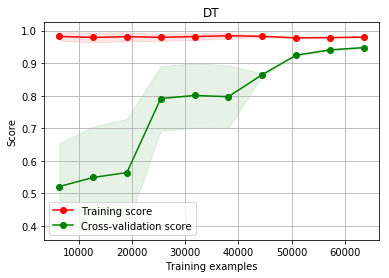

In [111]:
plot_learning_curve(clf_DT, title='DT',X=X_train, y=y_train)

- As we can see from then learning curve,training score is very high from the start and it does not change much.This indicates that model is over fitting.
- Score for the validation set is very low at the starting.It gradually increases,and almost equal to the training set in the end.
- As we can see from the right side of the graph,there is very less difference between training score and validation score,we can say that there is no bias and variance problem.

In [ ]:
# real_Predict_DT = clf_DT.predict(test_data_2)
# temp = pd.read_csv("samplesubmission-1558719607492.csv")
# temp['Suspicious'] = real_Predict_DT
# temp.to_csv('samplesubmission-1558719607492.csv',index=False)

### Random Forest:-

In [112]:
def RandomForest(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    print("THIS IS RANDOM FOREST MODEL")
    param_grid = { "criterion": ["entropy"],
            "n_estimators" : [300],
            "max_depth" : [20],
            "min_samples_leaf" : [5]}
#     param_grid = { "criterion": ["entropy","gini"],
#            "n_estimators" : [100,200,300,400,500],
#            "max_depth" : [5,10,20],
#            "min_samples_leaf" : [5,10,20]}
    rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring='recall_micro')
    #clf_RF = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF.fit(X=X_train, y=y_train)
    print(clf_RF.best_params_)
    print_Results(clf_RF)
    return clf_RF

In [113]:
 clf_RF=RandomForest(X_train,y_train)

THIS IS RANDOM FOREST MODEL
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 300}
Train Data confusion table :
 [[31838     0     6]
 [    1 31508   217]
 [   26   785 30915]]
Test Data confusion table :
 [[  24    0   13]
 [   2  370  106]
 [  15  415 7572]]
Scores for train:-

precision: [0.99915268 0.97569133 0.99283833]
recall: [0.99981158 0.99312866 0.97443737]
fscore: [0.99948202 0.98433278 0.98355179]
support: [31844 31726 31726]
Scores for test:-

precision: [0.58536585 0.47133758 0.98452737]
recall: [0.64864865 0.77405858 0.94626343]
fscore: [0.61538462 0.58590657 0.96501625]
support: [  37  478 8002]


<module 'matplotlib.pyplot' from 'C:\\Users\\Jiban\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

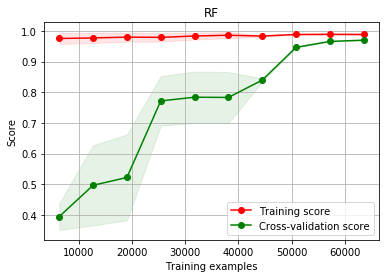

In [115]:
plot_learning_curve(clf_RF, title='RF',X=X_train, y=y_train)

- As we can see from then learning curve,training score is very high from the start and it does not change much.This indicates that model is over fitting.
- Score for the validation set is very low at the starting.It gradually increases,and almost equal to the training set in the end.
- As we can see from the right side of the graph,there is very less difference between training score and validation score,we can say that there is no bias and variance problem.

In [119]:
test_data_2.head(10)

,Quantity,TotalSalesValue,Product_Price,Mean_Product_Price,Mean_TotalSalesValue_ByPerson,Avg_SellingQty,Ratio_saleQty_to_AvgSellingQty,Mean_SellingQtyofSalesPerson,Ratio_Qty_to_MeanSaleQtySalesPerson,Ratio_TotalSalesValue_to_Mean_TotalSalesValue_ByPerson,sales_per_person,sales_per_product
0,-0.134280,-0.284033,-0.147267,-0.527963,-0.502058,-0.236077,-0.264438,-0.268271,-0.135950,-0.137350,-0.589601,-0.325392
1,-0.134280,-0.285804,-0.174945,-0.392040,-0.502058,-0.220240,-0.413940,-0.268271,-0.135950,-0.166430,-0.589601,-0.202037
2,-0.123429,-0.219338,-0.181406,-0.232271,-0.502058,-0.192470,-0.296758,-0.268271,0.590317,0.925210,-0.589601,3.491735
3,-0.134011,-0.284578,-0.181687,0.666883,-0.502058,-0.241106,-0.098057,-0.268271,-0.117943,-0.146298,-0.589601,-0.106095
4,-0.132307,-0.285667,-0.308200,-0.662136,-0.502058,-0.235121,-0.160626,-0.268271,-0.003901,-0.164193,-0.589601,-0.572100
5,-0.128182,-0.273682,-0.349223,-0.694215,-0.502058,-0.236306,0.142396,-0.268271,0.272200,0.032660,-0.589601,-0.592659
6,-0.130917,-0.284714,-0.354579,-0.662136,-0.502058,-0.235121,-0.075442,-0.268271,0.089133,-0.148535,-0.589601,-0.572100
7,-0.134011,-0.284578,-0.181687,0.666883,-0.502058,-0.241106,-0.098057,-0.268271,-0.117943,-0.146298,-0.589601,-0.106095
8,-0.134056,-0.286757,-0.210044,-0.232271,-0.502058,-0.192470,-0.479370,-0.268271,-0.120944,-0.182089,-0.589601,3.491735
9,-0.134369,-0.286076,-0.170346,-0.338324,-0.502058,-0.234614,-0.295160,-0.268271,-0.141952,-0.170904,-0.589601,-0.250008


### Logistic:-

In [116]:
def logistic(X_train,y_train):
    print("THIS IS LOGISTIC MODEL")
    param_grid = {
              }
    logreg = LogisticRegression(solver = 'lbfgs')
    clf_LG = GridSearchCV(logreg, param_grid, cv=2,scoring='recall_micro')
    #clf_LG = LogisticRegression(solver='lbfgs')
    clf_LG.fit(X_train, y_train)
    print_Results(clf_LG)
    return clf_LG

In [117]:
clf_LG=logistic(X_train,y_train)

THIS IS LOGISTIC MODEL
Train Data confusion table :
 [[18529  4568  8747]
 [ 2441 18215 11070]
 [ 1294  5983 24449]]
Test Data confusion table :
 [[  18    9   10]
 [  47  270  161]
 [ 332 1570 6100]]
Scores for train:-

precision: [0.83224039 0.63321282 0.55232007]
recall: [0.58186786 0.57413478 0.77062977]
fscore: [0.68488948 0.60222839 0.64346247]
support: [31844 31726 31726]
Scores for test:-

precision: [0.04534005 0.14602488 0.97273162]
recall: [0.48648649 0.56485356 0.76230942]
fscore: [0.08294931 0.23205844 0.85476074]
support: [  37  478 8002]
